# Fruits classifier with KNN

In [1]:
## Load dataset

In [4]:
import pandas as pd
data = pd.read_table('../../../datasets/supervised_ML/Knn/fruit_data_with_colors.txt')
data.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [6]:
data.tail(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [7]:
## Data Info

In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [11]:
data["fruit_name"].describe()

count         59
unique         4
top       orange
freq          19
Name: fruit_name, dtype: object

In [13]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


# Data visualization

In [14]:
import matplotlib.pyplot as plt

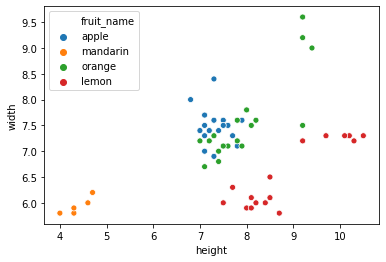

In [36]:
 import seaborn as sns
sns.scatterplot(x="height", y = "width", hue="fruit_name", data=data)


# Feature selection

In [16]:
x = data[["mass","width","height"]]
y = data["fruit_label"]

# Train test split

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

# Model training

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Testing

In [23]:
target_fruits_name = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))
print(target_fruits_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [25]:
predicted = knn.predict(x_test)
print(predicted)
for p in predicted:
    print(target_fruits_name[p])

[3 1 1 3 4 3 3 3 3 3 3 3 3 2 4]
orange
apple
apple
orange
lemon
orange
orange
orange
orange
orange
orange
orange
orange
mandarin
lemon


In [26]:
knn.score(x_test,y_test)

0.4666666666666667

# Change k value

In [27]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)

0.4

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)

0.6

# Deployment

In [33]:
fruit_prediction = knn.predict([[25,4.7,5.2]])
print(fruit_prediction)

[2]


In [34]:
print(target_fruits_name[fruit_prediction[0]])

mandarin


In [35]:
fruit_prediction = knn.predict([[180,8.0,6.8]])
print(target_fruits_name[fruit_prediction[0]])

apple
